In [1]:
#########################################
## Curso : Metodos Estadisticos
## Semana : 13
## Tema : Pruebas no parametricas
#########################################

#                          EJERCICIO 
# 14) Si la variabilidad del tiempo que se demora en ser atendido en la
# municipalidad cuando va a pagar sus impuestos es diferente en al
# menos uno de los distritos en estudio

# VARIABILIDAD ES LA DISPERSION

FILE2_URL <- "https://raw.githubusercontent.com/jgomezz/MsEstadAplic_MetodosEstadisticos/master/data/metodos_estadisticos/semana-11/ANSI/Caso_D.csv"
FILE2_ENCONDING <- "ISO-8859-1"

# Read file
Muni.data <- read.csv(FILE2_URL, fileEncoding = FILE2_ENCONDING)

In [2]:
head(Muni.data)

Distrito,Género,Pago.2014,Pago.2015,Robos,Atención,Opinión
Comas,Femenino,148.0,167.3,8,46.2,Muy Buena
Comas,Femenino,159.4,163.8,2,33.3,Excelente
Comas,Femenino,151.4,158.6,8,13.7,Pésima
Comas,Masculino,145.1,160.1,5,6.0,Excelente
Comas,Femenino,147.0,158.4,8,16.1,Pésima
Comas,Masculino,145.2,161.6,12,18.3,Regular


In [3]:
######################
# Prueba de Levene
######################
install.packages("lawstat")
library(lawstat)


also installing the dependencies ‘Kendall’, ‘VGAM’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: Kendall
Loading required package: mvtnorm
Loading required package: VGAM
Loading required package: stats4
Loading required package: splines


In [5]:
# la mediana no se ve afectado por los valores extremos
# la media si se ve afectado por los valores extremos

levene.test(Muni.data[,"Atención"], Muni.data[,"Distrito"], location="median")      # mediana 
#levene.test(muni[,6], muni[,1], location="mean")        # media
#levene.test(muni[,6], muni[,1], location="trim.mean")   # media podada


	modified robust Brown-Forsythe Levene-type test based on the absolute
	deviations from the median

data:  Muni.data[, "Atención"]
Test Statistic = 3.1896, p-value = 0.04479


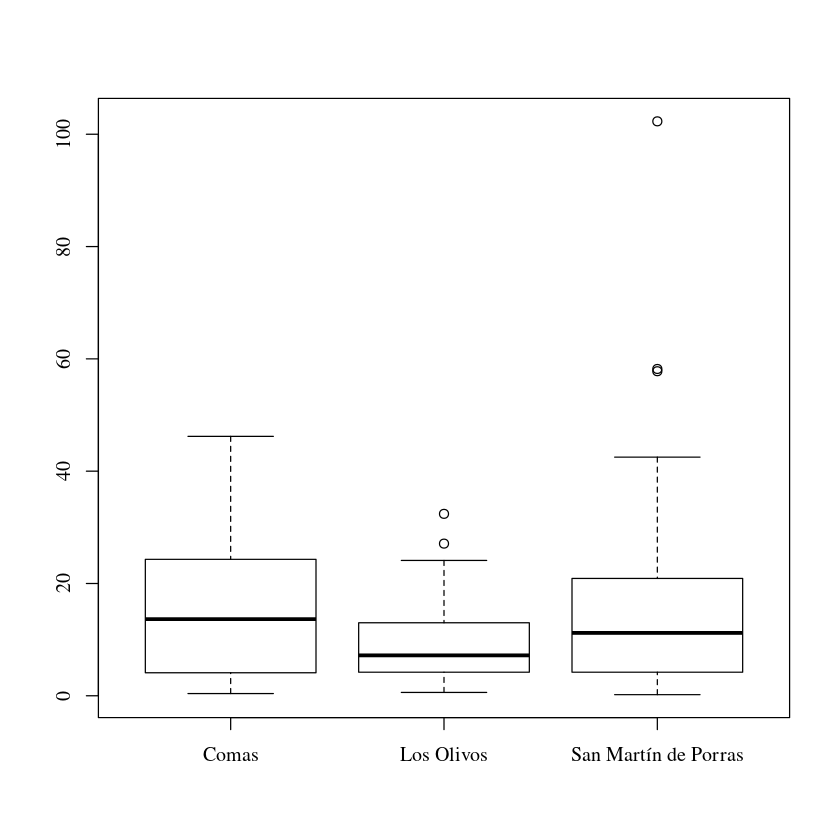

In [7]:
# se usa un diagrama de cajas
boxplot(Muni.data[,"Atención"]~ Muni.data[,"Distrito"])

In [6]:
######################
# Prueba de Fligner
######################
fligner.test(Muni.data[,"Atención"], Muni.data[,"Distrito"])



	Fligner-Killeen test of homogeneity of variances

data:  Muni.data[, "Atención"] and Muni.data[, "Distrito"]
Fligner-Killeen:med chi-squared = 10.016, df = 2, p-value = 0.006684


In [8]:
######################
# Prueba de Cochran
######################
install.packages("outliers")
library(outliers)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
x <- Muni.data[,"Atención"]
d <- data.frame(x=x, group=Muni.data[,"Distrito"] )
cochran.test(x ~ group, d)   


	Cochran test for outlying variance

data:  x ~ group
C = 0.64334, df = 40, k = 3, p-value = 2.148e-06
alternative hypothesis: Group San Martín de Porras has outlying variance
sample estimates:
               Comas           Los Olivos San Martín de Porras 
           165.14442             57.66731            401.91333 


In [10]:
#
#
#   1) H0:   theta1 = theta2 = theta3 ………….. = thetak
#      H1:  Al menos un thetai es diferente a los demás i = 1,2,3….,k
#
#   2) alfa = 0.05
#
#   3) p-valor
#
#            Prueba de Levene  =  0.04479 
#            Prueba de Fligner =  0.006684
#            Prueba de Cochran =  2.148e-06
#
#   4) Conclusión: A un alfa = 0.05, se puede afirmar que la variabilidad del tiempo de atención
#                  es diferente en al menos uno  de los distritos en evaluación